In [ ]:
import pandas as pd
import numpy as np

# Sample data
data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eva', 'Frank', 'Grace', 'Helen'],
    'MathScore': [88, 92, 85, 70, 76, 95, 500, 65]  # 500 is a clear outlier
}

df = pd.DataFrame(data)
# print(df)
print(df.describe())

        MathScore
count    8.000000
mean   133.875000
std    148.313796
min     65.000000
25%     74.500000
50%     86.500000
75%     92.750000
max    500.000000


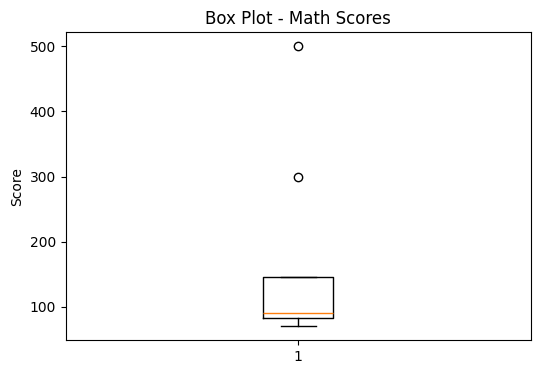

In [4]:
import matplotlib.pyplot as plt


plt.figure(figsize=(6, 4))
plt.boxplot(df['MathScore'])
plt.title("Box Plot - Math Scores")
plt.ylabel("Score")
plt.show()


In [8]:
# Detect Outliers Using IQR

Q1 = df['MathScore'].quantile(0.25)
Q3 = df['MathScore'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("IQR:", IQR)
print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)

outliers_iqr = df[(df['MathScore'] < lower_bound) | (df['MathScore'] > upper_bound)]

print("\nOutliers using IQR:\n", outliers_iqr)


IQR: 18.25
Lower Bound: 47.125
Upper Bound: 120.125

Outliers using IQR:
     Name  MathScore
6  Grace        500


In [9]:
import pandas as pd
import numpy as np
from scipy.stats import zscore

data = {
    'Name': ['Alice', 'Bob', 'Charlie', 'David', 'Eva', 'Frank', 'Grace', 'Helen'],
    'MathScore': [88, 92, 85, 70, 76, 95, 500, 65]
}

df = pd.DataFrame(data)

df['ZScore'] = zscore(df['MathScore'])

print(df[['Name', 'MathScore', 'ZScore']])


      Name  MathScore    ZScore
0    Alice         88 -0.330667
1      Bob         92 -0.301835
2  Charlie         85 -0.352291
3    David         70 -0.460411
4      Eva         76 -0.417163
5    Frank         95 -0.280211
6    Grace        500  2.639027
7    Helen         65 -0.496451


#  Handling Outliers

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore

# Sample dataset with some outliers
data = {
    'Student': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'],
    'MathScore': [78, 85, 89, 92, 120, 83, 77, 79, 76, 400],  # 400 is an outlier
    'ScienceScore': [72, 81, 78, 85, 88, 79, 75, 74, 73, 390]  # 390 is an outlier
}

df = pd.DataFrame(data)

In [15]:
Q1 = df["MathScore"].quantile(0.25)
Q3 = df["MathScore"].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

print(lower, upper)

median = df["MathScore"].median()
print(median)

58.75 110.75
84.0


In [ ]:
df.describe()

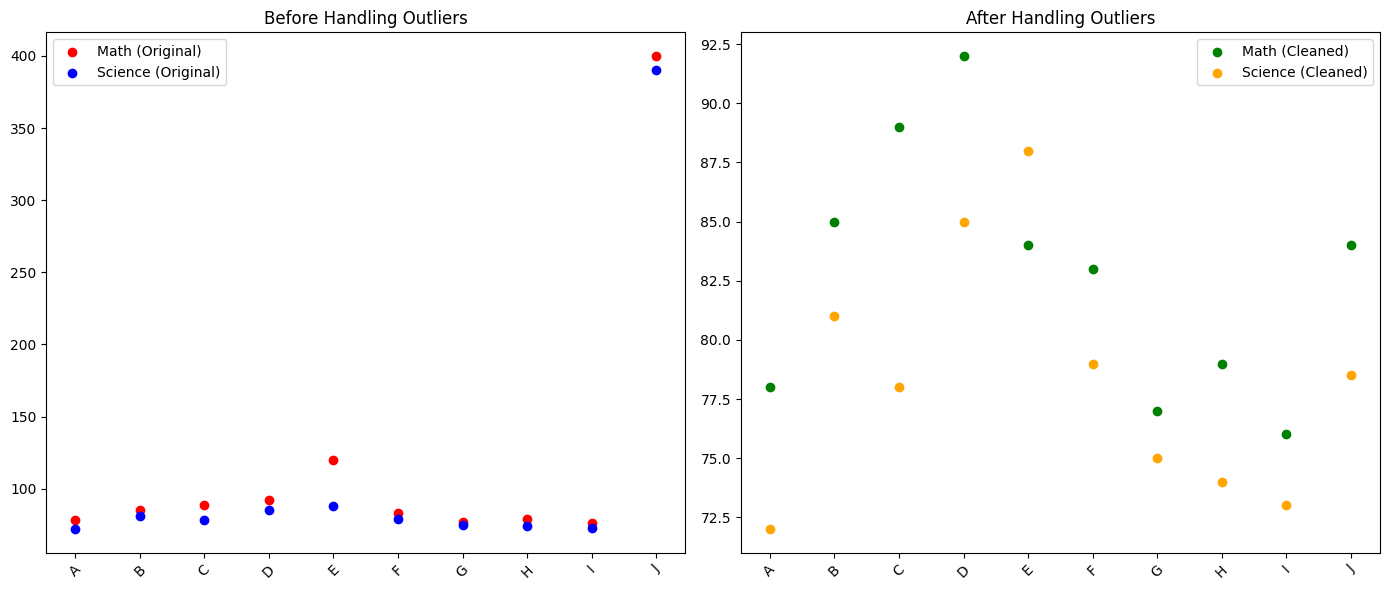

In [18]:
# Function to replace outliers using IQR
def replace_outliers_with_median(df, column_name):
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    median = df[column_name].median()
    return df[column_name].apply(lambda x: median if x < lower or x > upper else x)

# Apply outlier handling
df['MathScore_Cleaned'] = replace_outliers_with_median(df, 'MathScore')
df['ScienceScore_Cleaned'] = replace_outliers_with_median(df, 'ScienceScore')

# Visualize before and after
plt.figure(figsize=(14, 6))

# Before
plt.subplot(1, 2, 1)
plt.scatter(df['Student'], df['MathScore'], color='red', label='Math (Original)')
plt.scatter(df['Student'], df['ScienceScore'], color='blue', label='Science (Original)')
plt.title('Before Handling Outliers')
plt.xticks(rotation=45)
plt.legend()

# After
plt.subplot(1, 2, 2)
plt.scatter(df['Student'], df['MathScore_Cleaned'], color='green', label='Math (Cleaned)')
plt.scatter(df['Student'], df['ScienceScore_Cleaned'], color='orange', label='Science (Cleaned)')
plt.title('After Handling Outliers')
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.show()